In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,0.466767,0.414029,0.300443,0.2
1,0.0,0.656127,0.716262,0.259141,0.610095,0.466767,0.414029,0.300443,0.2
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,0.414029,0.300443,0.2
3,0.0,0.221791,0.344182,0.388712,0.907468,0.466767,0.335106,0.300443,0.2
4,0.0,0.243748,0.408165,0.669156,1.000000,0.466767,0.414029,0.300443,0.2
5,0.0,0.784492,0.998309,0.123009,0.000000,0.466767,0.414029,0.300443,0.2
6,0.0,0.068557,0.294178,0.407796,0.844982,0.466767,0.214318,0.300443,0.2
7,0.0,0.240608,0.404058,0.478170,0.653472,0.466767,0.414029,0.300443,0.2
8,0.0,0.909896,1.000000,0.483670,0.610095,0.466767,0.414029,0.300443,0.2
9,0.0,0.636643,0.718951,0.213241,0.610095,0.466767,0.414029,0.300443,0.2


In [3]:
X = dataset.iloc[:, [0,*range(2,9)]].values
Y = dataset['population'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 8


first_hidden_layer_size = 30
second_hidden_layer_size = 5

output_layer_size = 1


epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0864 - mean_absolute_error: 0.2437 - mean_squared_error: 0.0864 - val_loss: 0.0272 - val_mean_absolute_error: 0.1334 - val_mean_squared_error: 0.0272
Epoch 2/100
181/181 [==============================] - 0s 425us/step - loss: 0.0460 - mean_absolute_error: 0.1669 - mean_squared_error: 0.0460 - val_loss: 0.0248 - val_mean_absolute_error: 0.1232 - val_mean_squared_error: 0.0248
Epoch 3/100
181/181 [==============================] - 0s 482us/step - loss: 0.0408 - mean_absolute_error: 0.1621 - mean_squared_error: 0.0408 - val_loss: 0.0256 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0256
Epoch 4/100
181/181 [==============================] - 0s 432us/step - loss: 0.0373 - mean_absolute_error: 0.1577 - mean_squared_error: 0.0373 - val_loss: 0.0235 - val_mean_absolute_error: 0.1236 - val_mean_squared_error: 0.0235
Epoch 5/100
181/181 [====================

181/181 [==============================] - 0s 343us/step - loss: 0.0179 - mean_absolute_error: 0.1049 - mean_squared_error: 0.0179 - val_loss: 0.0122 - val_mean_absolute_error: 0.0854 - val_mean_squared_error: 0.0122
Epoch 37/100
181/181 [==============================] - 0s 219us/step - loss: 0.0179 - mean_absolute_error: 0.1039 - mean_squared_error: 0.0179 - val_loss: 0.0119 - val_mean_absolute_error: 0.0836 - val_mean_squared_error: 0.0119
Epoch 38/100
181/181 [==============================] - 0s 275us/step - loss: 0.0181 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0181 - val_loss: 0.0122 - val_mean_absolute_error: 0.0872 - val_mean_squared_error: 0.0122
Epoch 39/100
181/181 [==============================] - 0s 150us/step - loss: 0.0175 - mean_absolute_error: 0.1032 - mean_squared_error: 0.0175 - val_loss: 0.0115 - val_mean_absolute_error: 0.0815 - val_mean_squared_error: 0.0115
Epoch 40/100
181/181 [==============================] - 0s 363us/step - loss: 0.0177 - mean_a

Epoch 72/100
181/181 [==============================] - 0s 293us/step - loss: 0.0157 - mean_absolute_error: 0.0970 - mean_squared_error: 0.0157 - val_loss: 0.0116 - val_mean_absolute_error: 0.0818 - val_mean_squared_error: 0.0116
Epoch 73/100
181/181 [==============================] - 0s 129us/step - loss: 0.0153 - mean_absolute_error: 0.0967 - mean_squared_error: 0.0153 - val_loss: 0.0119 - val_mean_absolute_error: 0.0835 - val_mean_squared_error: 0.0119
Epoch 74/100
181/181 [==============================] - 0s 306us/step - loss: 0.0153 - mean_absolute_error: 0.0970 - mean_squared_error: 0.0153 - val_loss: 0.0117 - val_mean_absolute_error: 0.0828 - val_mean_squared_error: 0.0117
Epoch 75/100
181/181 [==============================] - 0s 127us/step - loss: 0.0153 - mean_absolute_error: 0.0976 - mean_squared_error: 0.0153 - val_loss: 0.0120 - val_mean_absolute_error: 0.0843 - val_mean_squared_error: 0.0120
Epoch 76/100
181/181 [==============================] - 0s 125us/step - loss: 0.

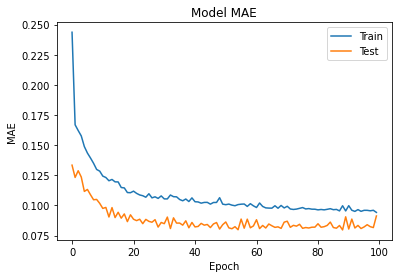

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

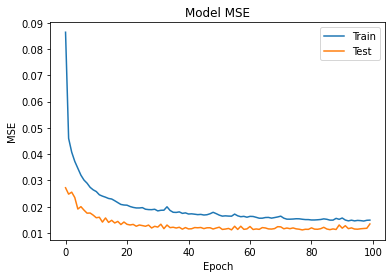

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

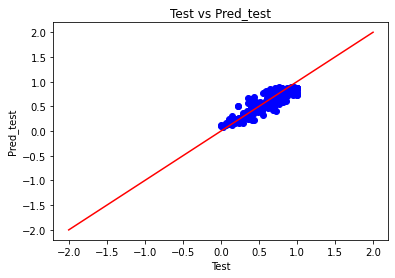

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

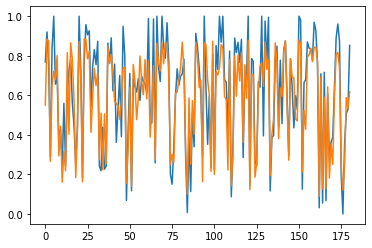

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

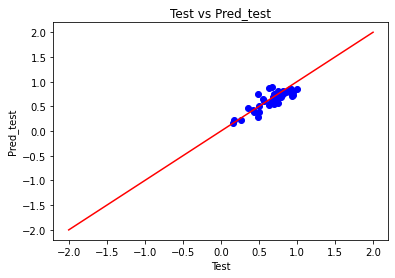

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

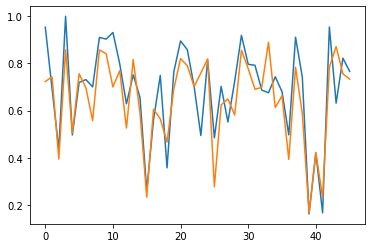

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.12267463343363288
0.1160632708270263


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9878458380699158, p = 0.12223241478204727
Test k = 0.9534933567047119, p = 0.06399988383054733


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9845209121704102, p_s = 0.014118432998657227
k_n = 7.054624899790436, p_n = 0.029383780225237625


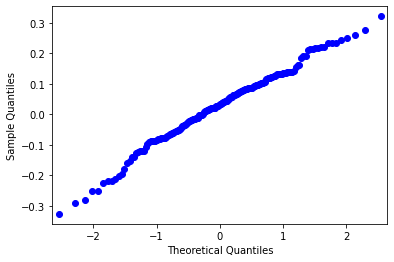

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

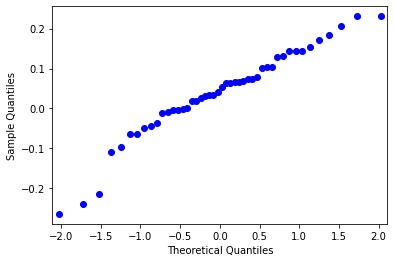

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

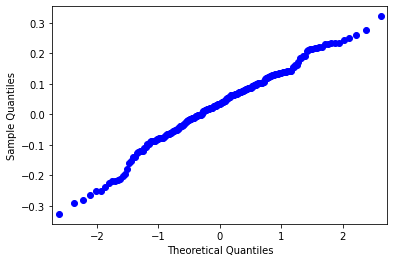

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

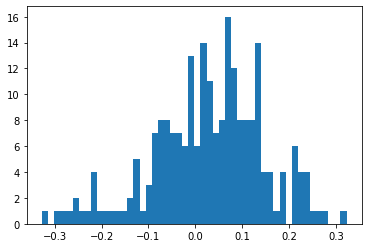

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')